In [1]:
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np
import env
import os
import prepare
import acquire
import prepare
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns

import matplotlib.pyplot as plt

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

In [27]:
iris_df = acquire.get_iris_data()
iris_df = iris_df.drop(iris_df.columns[0:3], axis = 1)

In [28]:
train, validate, test = prepare.train_val_test(iris_df)

Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [29]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.842857,3.009524,3.870476,1.239048
std,0.833304,0.418910,1.721355,0.742720
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.700000,0.400000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.200000,6.700000,2.500000


In [40]:
num_cols = train.columns[[train[col].dtype!= 'object' for col in train.columns]]
num_cols
#loop through for plots

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

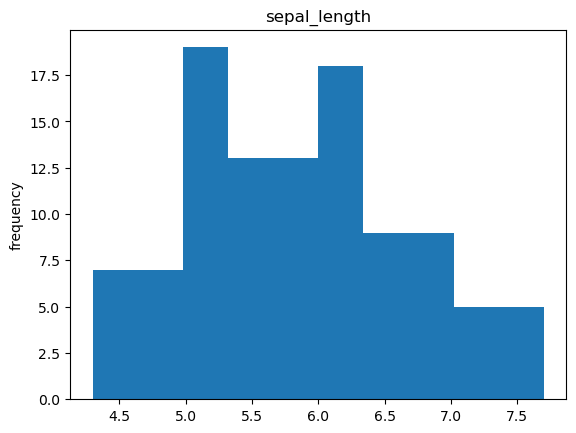

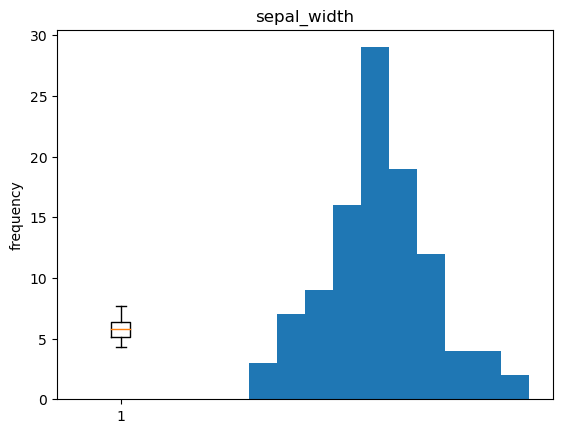

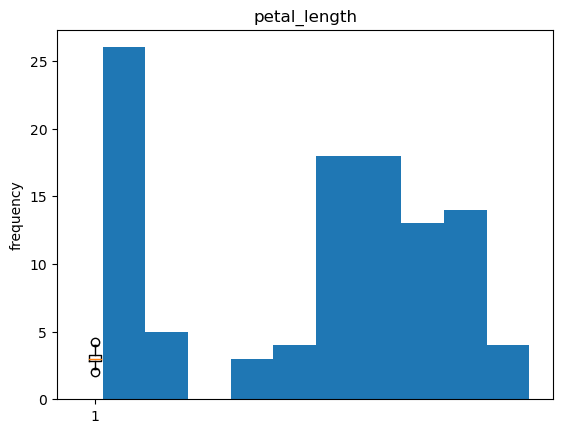

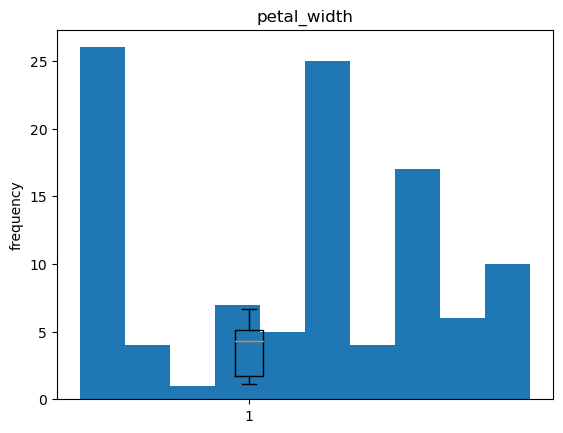

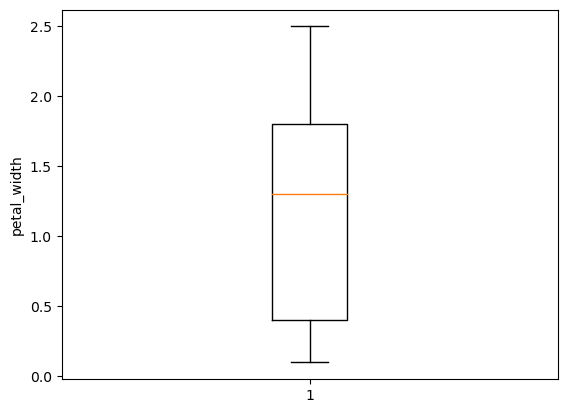

In [41]:
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.ylabel('frequency')
    plt.show()

    plt.boxplot(train[col])
    plt.ylabel(col)
    plt.show

    train[col].describe()

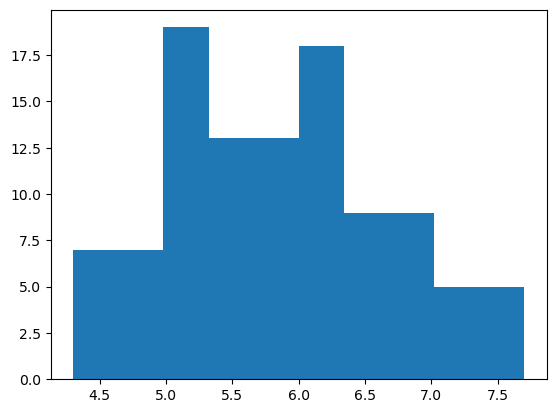

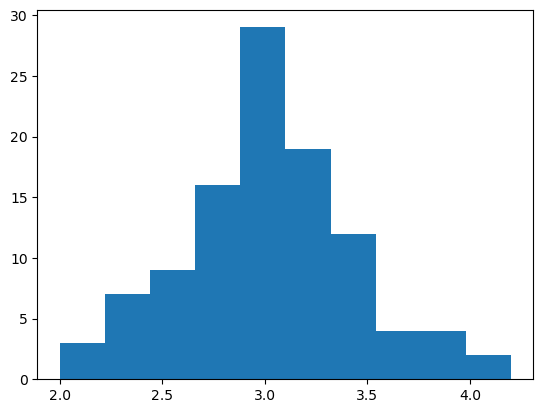

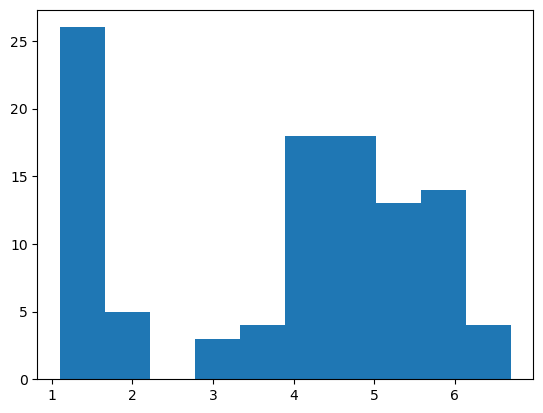

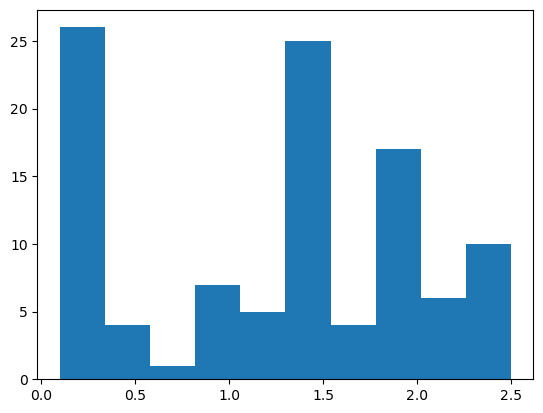

In [42]:
plt.hist(train.sepal_length)
plt.show()
plt.hist(train.sepal_width)
plt.show()   
plt.hist(train.petal_length)
plt.show()
plt.hist(train.petal_width)
plt.show()

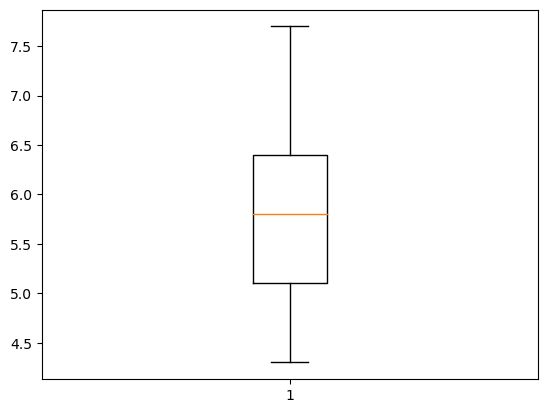

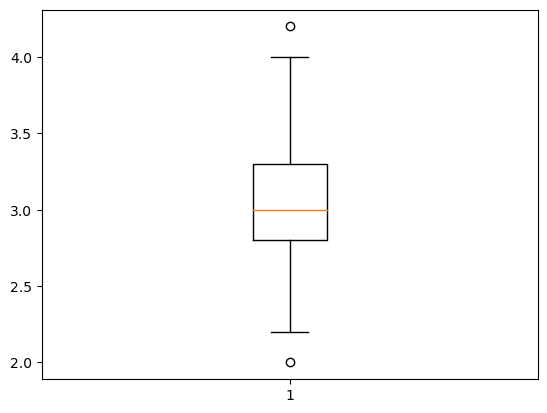

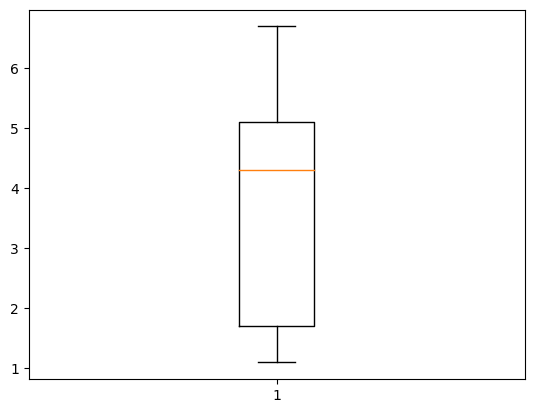

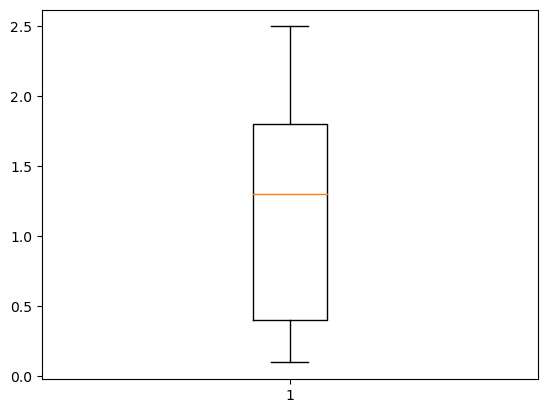

In [43]:
plt.boxplot(train.sepal_length)
plt.show()
plt.boxplot(train.sepal_width)
plt.show()   
plt.boxplot(train.petal_length)
plt.show()
plt.boxplot(train.petal_width)
plt.show()

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [44]:
df_iris=pd.DataFrame(train, columns=['species_name','species_id'])
df_iris.value_counts()

Series([], dtype: int64)

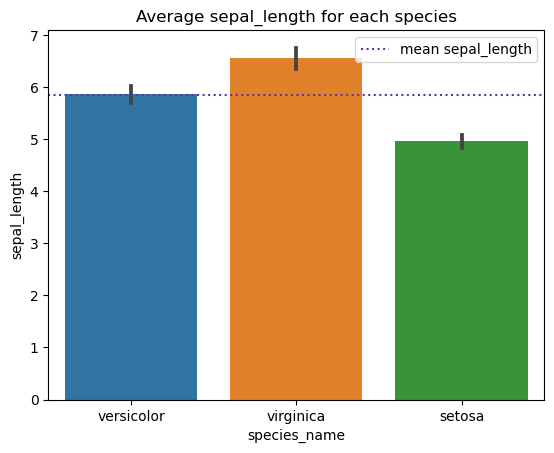

In [50]:
col = 'sepal_length'
sns.barplot(x = 'species_name', y = col, data =train)
plt.title(f'Average {col} for each species')
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label = f'mean {col}',color = 'rebeccapurple' , linestyle = 'dotted')
plt.legend()
plt.show()

TypeError: '>' not supported between instances of 'float' and 'method'

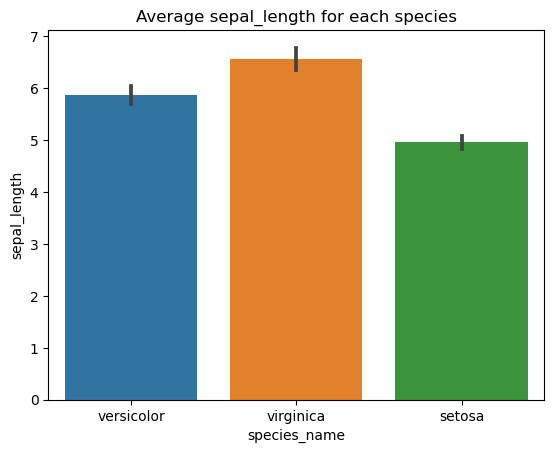

In [52]:

for col in num_cols:
    sns.barplot(x = 'species_name', y = col, data =train)
    plt.title(f'Average {col} for each species')
    overall_mean = train[col].mean
    plt.axhline(overall_mean, label = f'mean {col}',color = 'rebeccapurple' , linestyle = 'dotted')
    plt.legend()
    plt.show()

Document takeaways & any actions.

Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

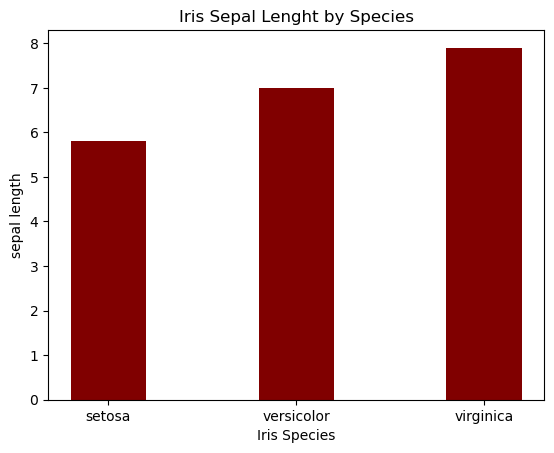

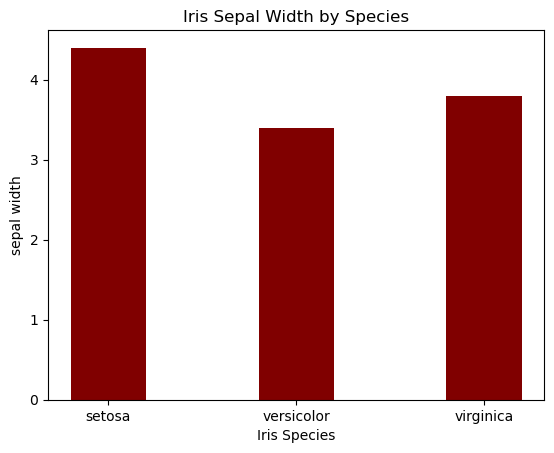

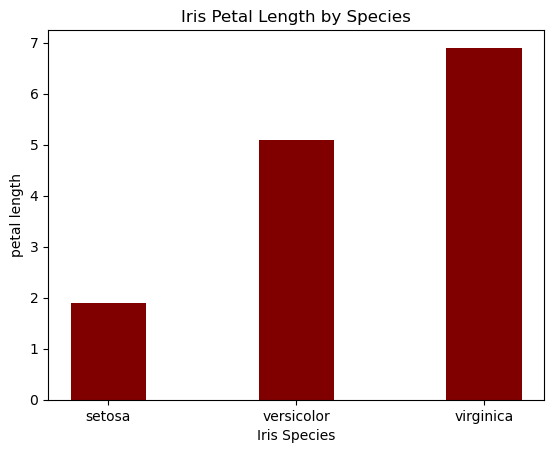

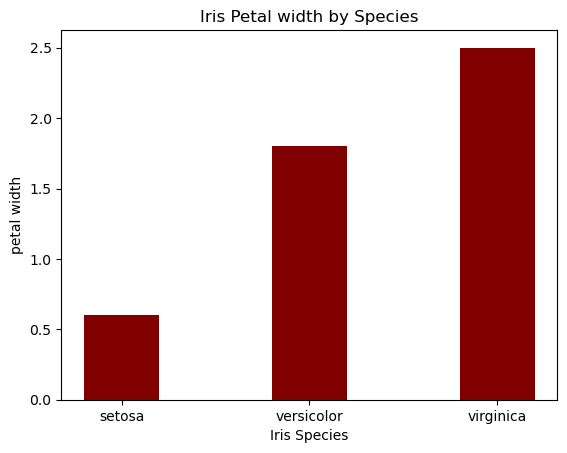

In [18]:
plt.bar(iris_df.species_name, iris_df.sepal_length, color ='maroon',width = 0.4)
 
plt.xlabel("Iris Species")
plt.ylabel("sepal length")
plt.title("Iris Sepal Lenght by Species")
plt.show()

plt.bar(iris_df.species_name, iris_df.sepal_width, color ='maroon',width = 0.4)
 
plt.xlabel("Iris Species")
plt.ylabel("sepal width")
plt.title("Iris Sepal Width by Species")
plt.show()

plt.bar(iris_df.species_name, iris_df.petal_length, color ='maroon',width = 0.4)
 
plt.xlabel("Iris Species")
plt.ylabel("petal length")
plt.title("Iris Petal Length by Species")
plt.show()

plt.bar(iris_df.species_name, iris_df.petal_width, color ='maroon',width = 0.4)
 
plt.xlabel("Iris Species")
plt.ylabel("petal width")
plt.title("Iris Petal width by Species")
plt.show()

For each measurement type, compute the descriptive statistics for each species.

In [20]:
df_iris_num=pd.DataFrame(iris_df, columns=['petal_length','petal_width', 'sepal_length','sepal_width','species_name'])
df_iris_num.describe()

,petal_length,petal_width,sepal_length,sepal_width
count,150.000000,150.000000,150.000000,150.000000
mean,3.758000,1.199333,5.843333,3.057333
std,1.765298,0.762238,0.828066,0.435866
min,1.000000,0.100000,4.300000,2.000000
25%,1.600000,0.300000,5.100000,2.800000
50%,4.350000,1.300000,5.800000,3.000000
75%,5.100000,1.800000,6.400000,3.300000
max,6.900000,2.500000,7.900000,4.400000


For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [37]:
vir_iris = iris_df[iris_df.species_name == 'virginica'].drop(['species_id', 'measurement_id'], axis=1)
vir_iris

ver_iris = iris_df[iris_df.species_name == 'versicolor'].drop(['species_id', 'measurement_id'], axis=1)
ver_iris

print(stats.mannwhitneyu(vir_iris.petal_width, ver_iris.petal_width, alternative='two-sided'))
print(stats.mannwhitneyu(vir_iris.petal_length, ver_iris.petal_length, alternative='two-sided'))
print(stats.mannwhitneyu(vir_iris.sepal_width, ver_iris.sepal_width, alternative='two-sided'))
print(stats.mannwhitneyu(vir_iris.sepal_length, ver_iris.sepal_length, alternative='two-sided'))



MannwhitneyuResult(statistic=2451.0, pvalue=9.698045444914185e-17)
MannwhitneyuResult(statistic=2455.5, pvalue=9.133544727668256e-17)
MannwhitneyuResult(statistic=1659.0, pvalue=0.004572142206879863)
MannwhitneyuResult(statistic=1974.0, pvalue=5.869006410664197e-07)


Document takeaways & any actions.

across all measurment stats there is a significant difference between versicolor and virginica

Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_33672/2089927331.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris12 = ver_iris.append(vir_iris)


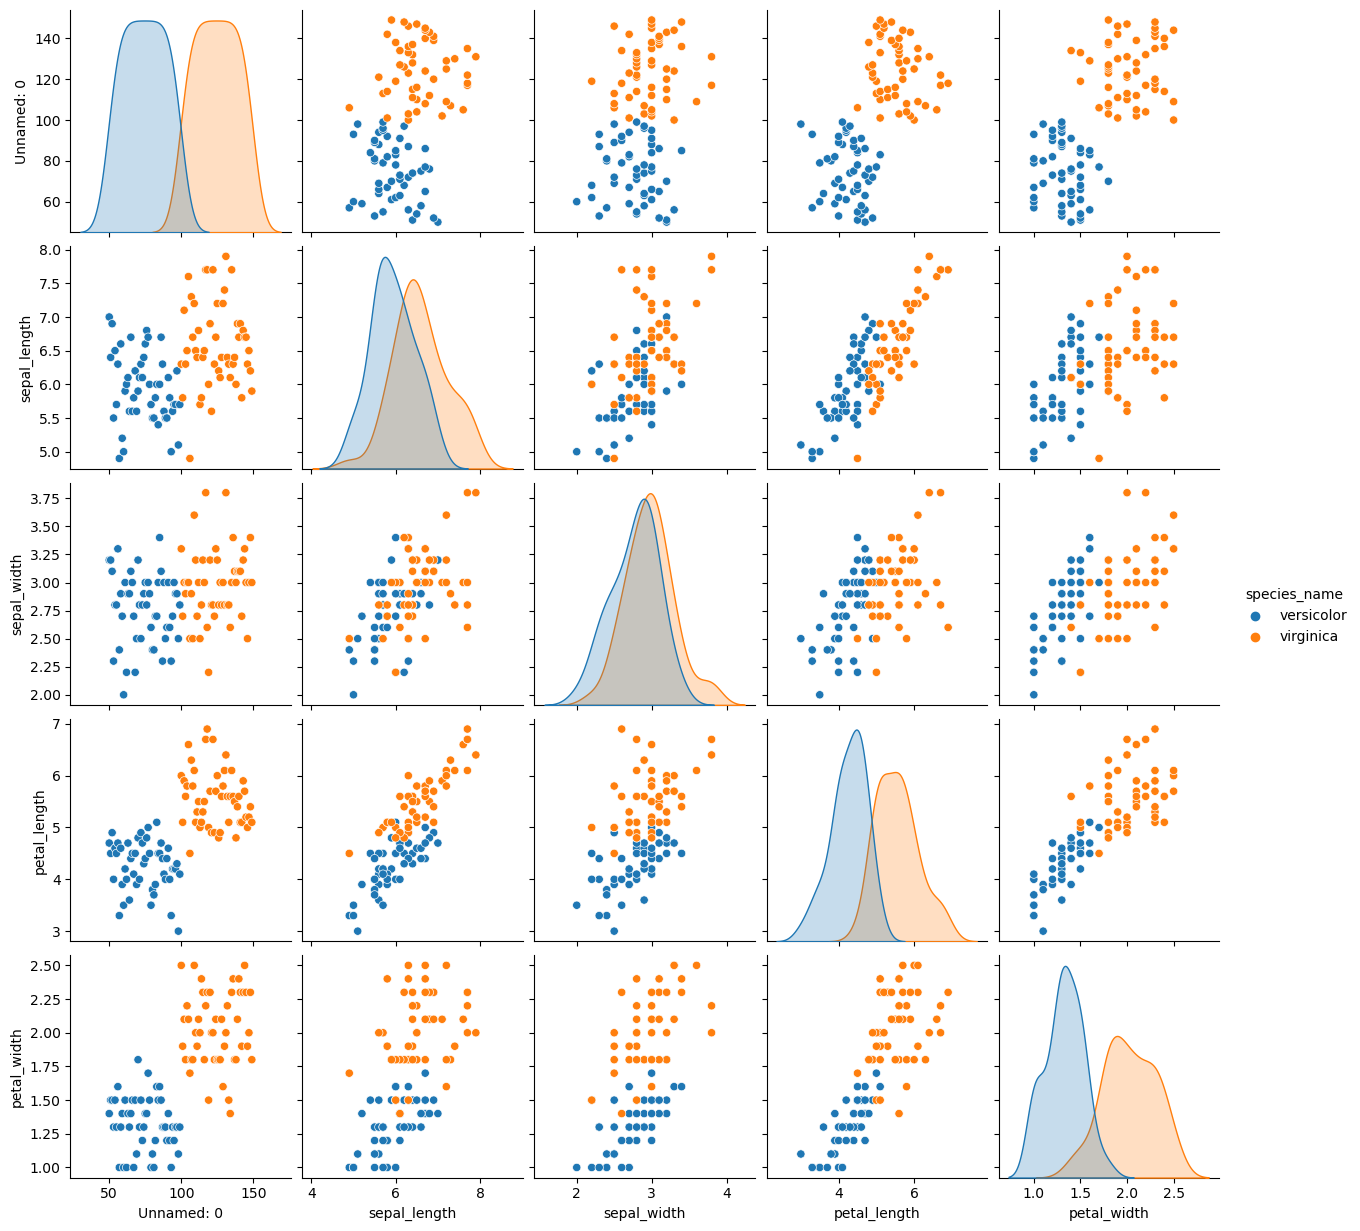

In [40]:
iris12 = ver_iris.append(vir_iris)
sns.pairplot(iris12, hue="species_name")

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

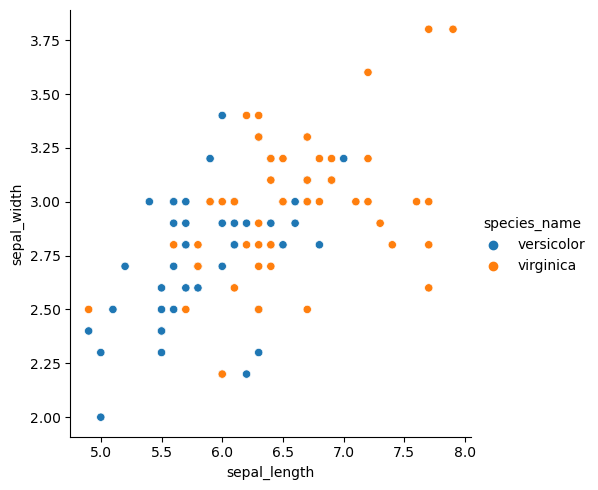

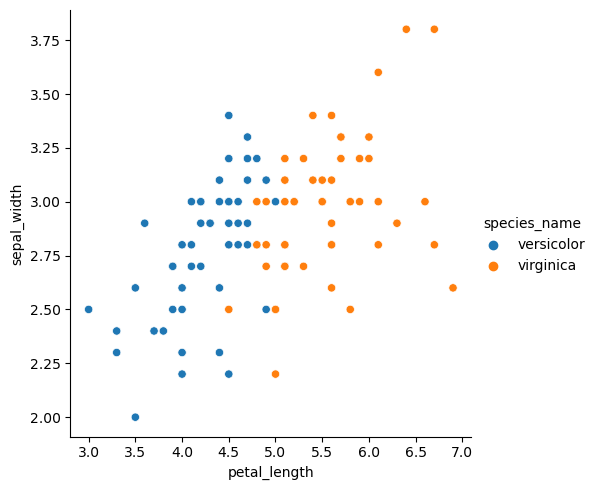

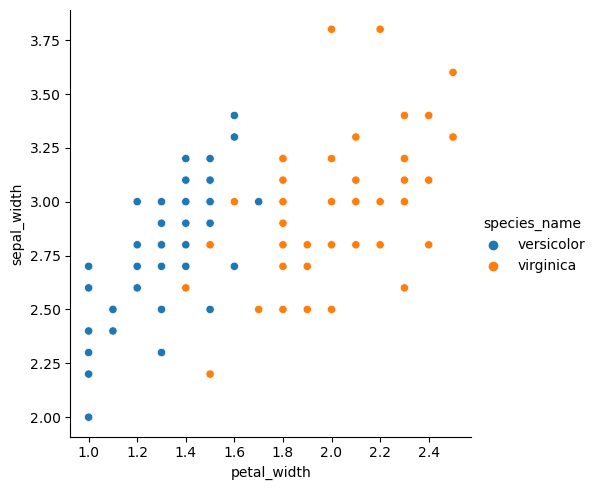

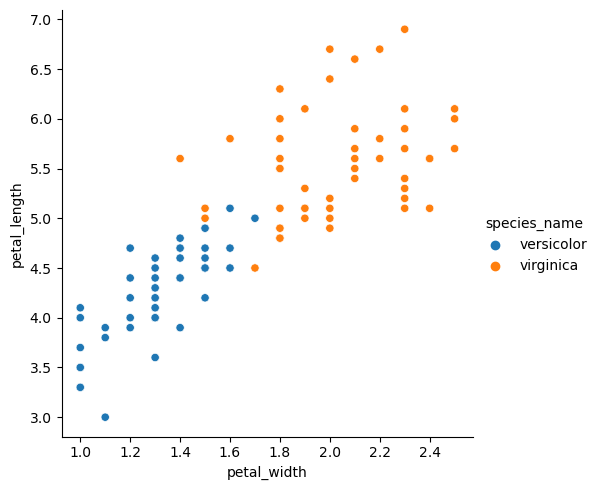

In [43]:
sns.relplot(data=iris12, x="sepal_length", y="sepal_width", hue="species_name")
plt.show()
sns.relplot(data=iris12, x="petal_length", y="sepal_width", hue="species_name")
plt.show()
sns.relplot(data=iris12, x="petal_width", y="sepal_width", hue="species_name")
plt.show()
sns.relplot(data=iris12, x="petal_width", y="petal_length", hue="species_name")
plt.show()

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

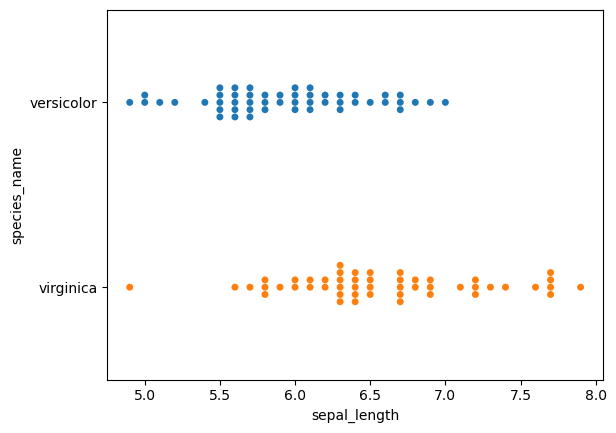

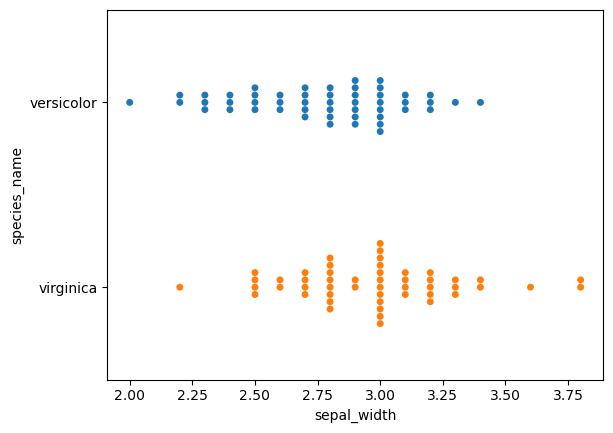

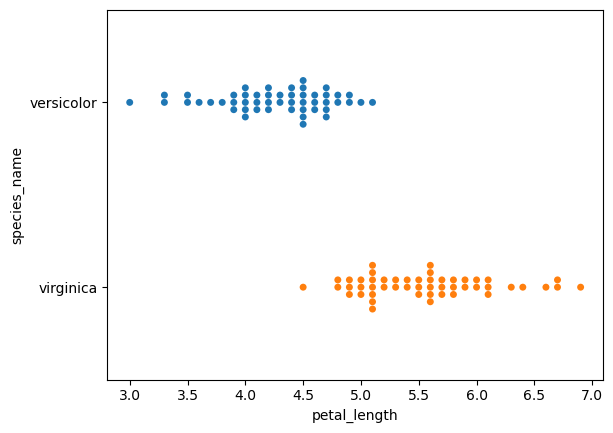

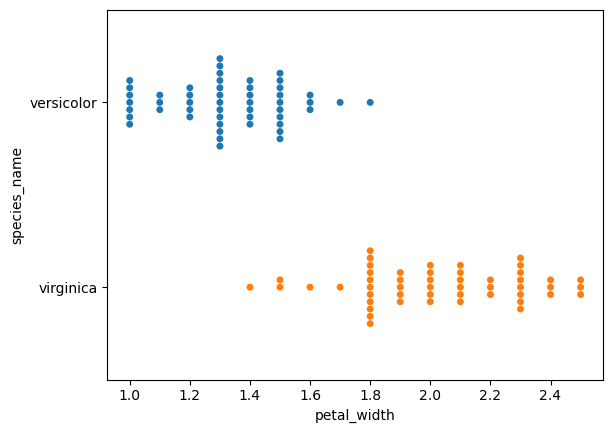

In [45]:
sns.swarmplot(data=iris12, x="sepal_length", y="species_name")
plt.show()
sns.swarmplot(data=iris12, x="sepal_width", y="species_name")
plt.show()
sns.swarmplot(data=iris12, x="petal_length", y="species_name")
plt.show()
sns.swarmplot(data=iris12, x="petal_width", y="species_name")
plt.show()

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

is sepal width significantly different across virginica and versicolor?  
h0: there is no significant difference  
hA: there is a significant difference  

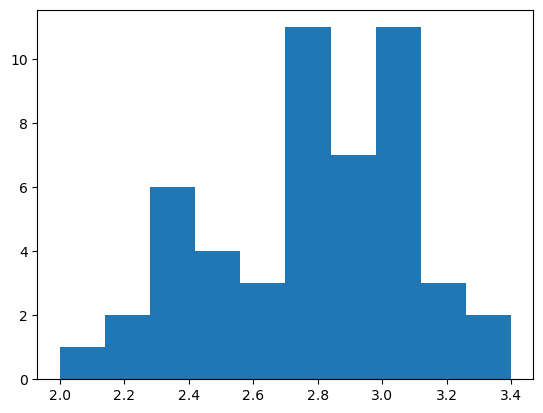

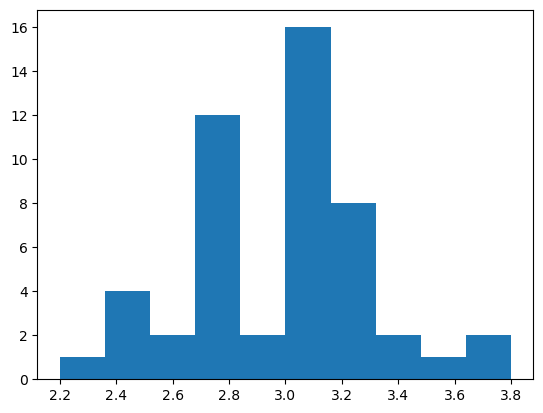

In [48]:
plt.hist(ver_iris.sepal_width)
plt.show()
plt.hist(vir_iris.sepal_width)
plt.show()

In [49]:
stats.ttest_ind(ver_iris.sepal_width, vir_iris.sepal_width)

Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803)

Document takeaways and any actions.

our null hypothesis is rejected by the low P

Part II
Explore your titanic dataset more completely.

Determine drivers of the target variable

Determine if certain columns should be dropped

In [53]:
titanic_df = acquire.get_titanic_data()
titanic_df.drop([titanic_df.columns[0], 'passenger_id', 'deck', 'embarked','class'], axis = 1, inplace = True)

titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Determine if it would be valuable to bin some numeric columns

In [59]:
#age binning and fare binning could be helpful
titanic_df.loc[titanic_df.age.between(0,18, 'both'), 'age_group'] = 'child'
titanic_df.loc[titanic_df.age.between(18, 30, 'right'), 'age_group'] = 'young adult'
titanic_df.loc[titanic_df.age.between(30,50, 'right'), 'age_group'] = 'adult'
titanic_df.loc[titanic_df.age.between(50,90, 'right'), 'age_group'] = 'elderly'

titanic_df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,age_group
0,0,3,male,22.0,1,0,7.2500,Southampton,0,young adult
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,adult
2,1,3,female,26.0,0,0,7.9250,Southampton,1,young adult
3,1,1,female,35.0,1,0,53.1000,Southampton,0,adult
4,0,3,male,35.0,0,0,8.0500,Southampton,1,adult
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Queenstown,0,adult
886,0,2,male,27.0,0,0,13.0000,Southampton,1,young adult
887,1,1,female,19.0,0,0,30.0000,Southampton,1,young adult
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1,young adult


Determine if it would be valuable to combine multiple columns into one.

In [ ]:
#no

Does it make sense to combine any features?

In [ ]:
#no

Do you find any surprises?

In [ ]:
#no

Document any and all findings and takeaways in your notebook using markdown.

Part III
Explore your telco data to discover drivers of churn

In [63]:
telco_df = acquire.get_telco_data()
telco_df.describe()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,2033.283305,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1760.500000,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,3521.000000,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,5281.500000,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,7042.000000,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


Determine if certain columns should be dropped

In [61]:
telco_df.drop([telco_df.columns[0], 'payment_type_id','internet_service_type_id','contract_type_id'], axis = 1, inplace = True)

Determine if it would be valuable to bin some numeric columns

In [86]:
#binning tenure could be helpful
telco_df.loc[telco_df.tenure.between(0,24, 'both'), 'tenure_group'] = 'short tenure'
telco_df.loc[telco_df.tenure.between(24, 48, 'right'), 'tenure_group'] = 'two_four'
telco_df.loc[telco_df.tenure.between(48,72, 'right'), 'tenure_group'] = 'four_three'
telco_df['total_charges'] = (telco_df.tenure) * (telco_df.monthly_charges)
telco_df.describe()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692,2279.581350
std,2033.283305,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047,2264.729447
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000,0.000000
25%,1760.500000,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000,394.000000
50%,3521.000000,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000,1393.600000
75%,5281.500000,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000,3786.100000
max,7042.000000,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000,8550.000000


In [79]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

Determine if it would be valuable to combine multiple columns into one.
What are your drivers of churn?

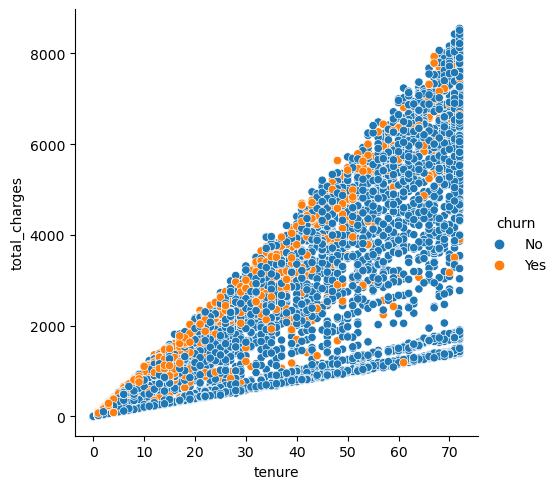

In [87]:
sns.relplot(data=telco_df, x="tenure", y="total_charges", hue="churn")
plt.show()

Does it make sense to combine any features?

In [ ]:
#yes; monthly charges and tenure to make 'total_charges'

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.